
Meta Information of the Iris dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0              

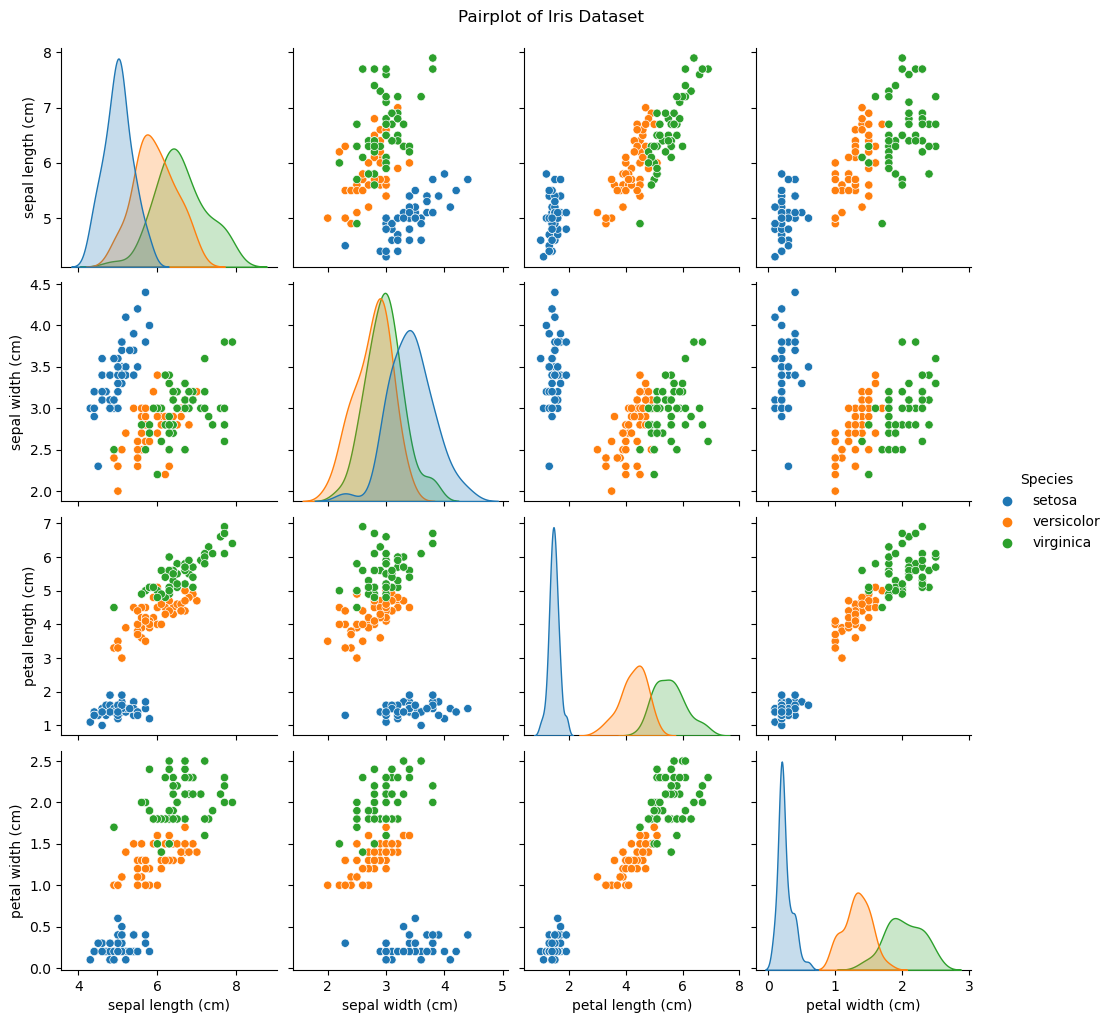

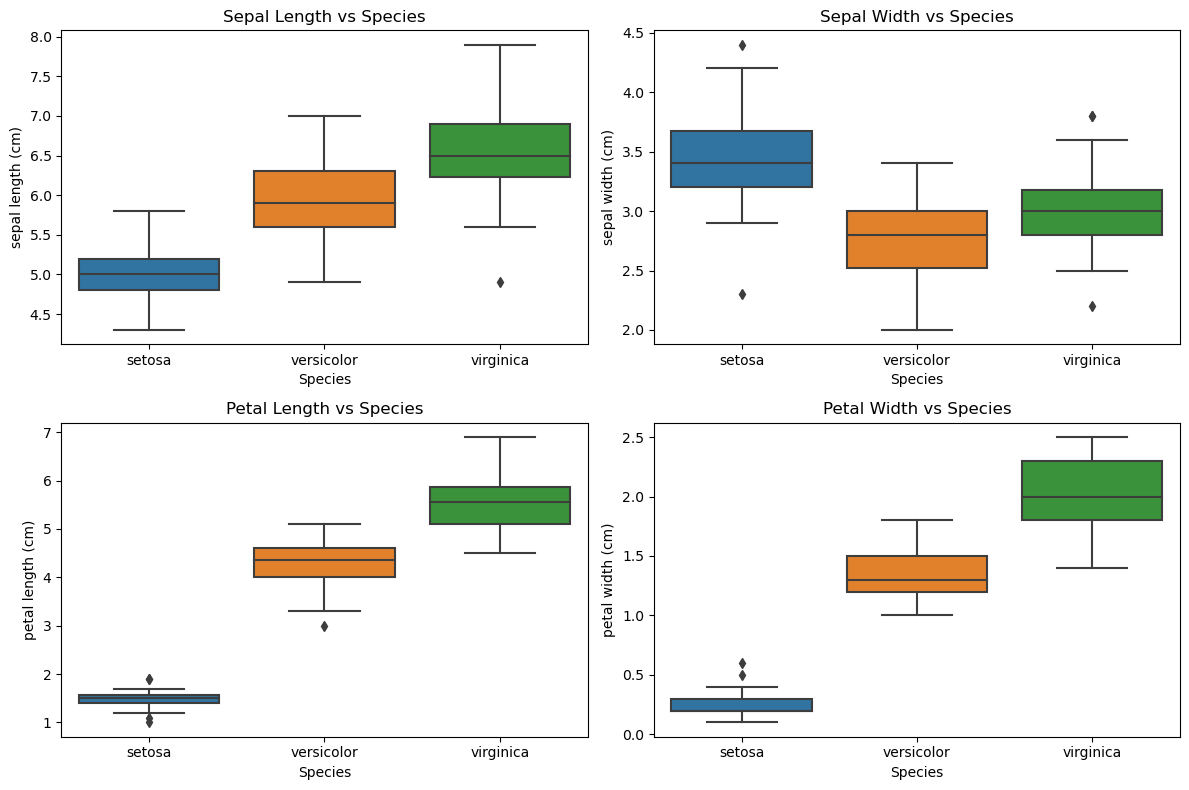


Logistic Regression Accuracy: 1.0


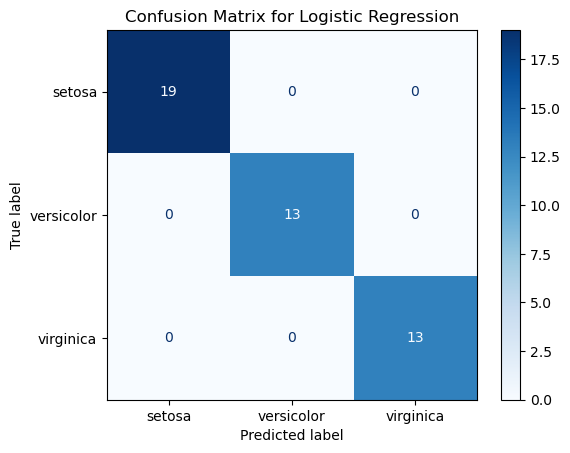

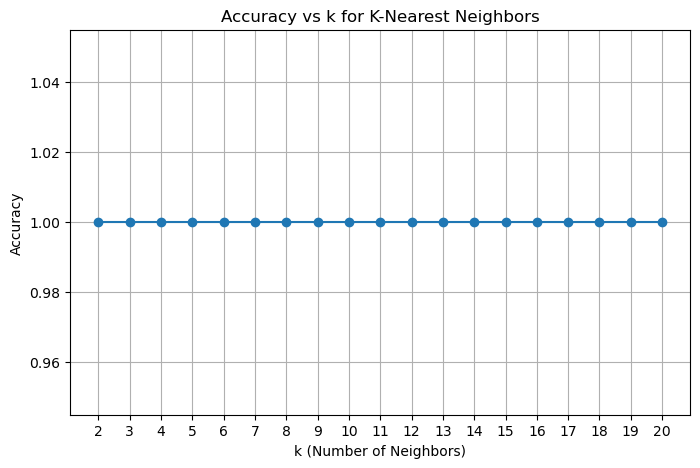


Best k for K-Nearest Neighbors: 2 with accuracy: 1.0


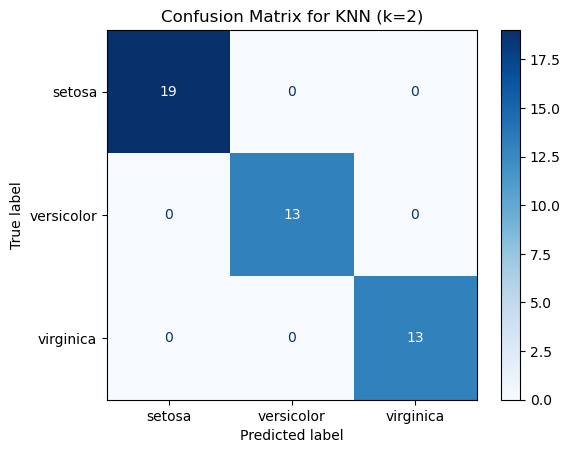


Best KNN Model Accuracy: 1.0

Logistic Regression Accuracy: 1.0
Best KNN Model Accuracy (k=2): 1.0

KNN performs better than Logistic Regression for this dataset.


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load the Iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]  # Add the target class names

# 1. Meta Information
print("\nMeta Information of the Iris dataset:")
print(df.info())
print("\nFirst 5 rows of the Iris dataset:")
print(df.head())

# 2. Visualize the Class Label against Predictor Variables
# Pairplot to visualize relationships between features colored by species
sns.pairplot(df, hue='Species')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

# Boxplots for each feature with respect to the species class
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='sepal length (cm)', data=df)
plt.title('Sepal Length vs Species')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='sepal width (cm)', data=df)
plt.title('Sepal Width vs Species')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='petal length (cm)', data=df)
plt.title('Petal Length vs Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='petal width (cm)', data=df)
plt.title('Petal Width vs Species')

plt.tight_layout()
plt.show()

# 3. Logistic Regression Model
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target

# Split the dataset into 70% training and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

# Predict the class labels on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"\nLogistic Regression Accuracy: {accuracy_log_reg}")

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_log_reg_display = ConfusionMatrixDisplay(cm_log_reg, display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 4. K-Nearest Neighbors Classifier for k values between 2 and 20
k_values = range(2, 21)
accuracies_knn = []

# Loop through k values and train KNN models
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracies_knn.append(accuracy_score(y_test, y_pred_knn))

# Plot accuracies for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies_knn, marker='o')
plt.title('Accuracy vs k for K-Nearest Neighbors')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k value
best_k = k_values[np.argmax(accuracies_knn)]
print(f"\nBest k for K-Nearest Neighbors: {best_k} with accuracy: {max(accuracies_knn)}")

# 5. Compare Logistic Regression and KNN Classifiers
# Train the best KNN model with the optimal k value
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Predict with the best KNN model
y_pred_knn_best = best_knn_model.predict(X_test)

# Confusion Matrix for the Best KNN Model
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)
cm_knn_best_display = ConfusionMatrixDisplay(cm_knn_best, display_labels=iris.target_names).plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN (k={best_k})')
plt.show()

# Accuracy for Best KNN Model
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"\nBest KNN Model Accuracy: {accuracy_knn_best}")

# Final Comparison
print(f"\nLogistic Regression Accuracy: {accuracy_log_reg}")
print(f"Best KNN Model Accuracy (k={best_k}): {accuracy_knn_best}")

# Comment on the best model
if accuracy_log_reg > accuracy_knn_best:
    print("\nLogistic Regression performs better than KNN for this dataset.")
else:
    print("\nKNN performs better than Logistic Regression for this dataset.")
